## Data 780 - Final Project

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the initial process of investigating the dataset to find patterns, spot anomalies, and summarize main characteristics. It is crucial to understand the data's features, relationships, and to identify errors before formal modeling.

--- 
#### Table of Contents
1. Python imports
2. Unzipping & reading in the CSVs
3. `reddit_data.csv` Analysis
    - Overview of the dataset
    - Breakdown of most common words and features
4. `kaggle_data.csv` Analysis
    - Overview of the dataset
    - Breakdown of most common words and features
5. Clean up files for GitHub Repo
---

In [ ]:
# 1. Python Imports
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import pprint

In [ ]:
# Combine the split reddit data files into one
os.system('cat data/split_reddit_data.zip* > data/reddit_data.zip')

0

In [6]:
# 2. Unzip the datasets
files = ['reddit_data.zip', 'kaggle_data.csv.zip']

for file in files:

    zip_file_path = f'data/{file}'
    extract_to_path = 'data/'

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zf:
            zf.extractall(path=extract_to_path)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_to_path}'.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid ZIP file.")
    except FileNotFoundError:
        print(f"Error: ZIP file not found at '{zip_file_path}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Load CSVs
reddit_df = pd.read_csv('data/reddit_data.csv')
kaggle_df = pd.read_csv('data/kaggle_data.csv')

Successfully extracted 'data/reddit_data.zip' to 'data/'.
Successfully extracted 'data/kaggle_data.csv.zip' to 'data/'.


---
### Reddit Dataset Overview

In [13]:
# Show the first few rows
reddit_df.head(10)

,body,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ENTJ,...,ESFP,class,Introvert,Extrovert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving
0,"['knowing', 'youre', 'tool', 'use', 'interacti...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
1,"['truly', 'enlightened', 'mastermind']",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
2,"['help', 'moment', 'hobby', 'keep', 'mind', 'b...",0,0,1,0,0,0,0,0,0,...,0,INFJ,1,0,0,1,0,1,1,0
3,"['watch', 'bit', 'everything', 'including', 'h...",0,0,0,0,0,0,0,1,0,...,0,INTP,1,0,0,1,1,0,0,1
4,"['dont', 'know', 'would', 'count', 'pet', 'pee...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
5,"['ah', 'sure', 'se', 'work', 'type', 'play', '...",0,0,0,0,0,0,0,1,0,...,0,INTP,1,0,0,1,1,0,0,1
6,"['think', 'military', 'job', 'people', 'volunt...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
7,"['mostly', 'try', 'get', 'caught', 'anything',...",0,0,1,0,0,0,0,0,0,...,0,INFJ,1,0,0,1,0,1,1,0
8,"['based', 'two', 'politician', 'eye', 'year', ...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0
9,"['score', 'individual', 'level', 'mean', 'litt...",0,0,0,1,0,0,0,0,0,...,0,INTJ,1,0,0,1,1,0,1,0


In [24]:
# Statistical summary
reddit_df.describe().round(2)

,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ENTJ,ENTP,...,ESTP,ESFP,Introvert,Extrovert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving
count,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,...,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00,1651100.00
mean,0.01,0.00,0.12,0.22,0.03,0.01,0.11,0.27,0.03,0.12,...,0.01,0.00,0.77,0.23,0.07,0.93,0.69,0.31,0.39,0.61
std,0.10,0.06,0.32,0.41,0.17,0.08,0.31,0.45,0.16,0.32,...,0.09,0.07,0.42,0.42,0.25,0.25,0.46,0.46,0.49,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [14]:
# Dataframe columns
reddit_df.columns

Index(['body', 'ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP', 'INTP',
       'ENTJ', 'ENTP', 'ENFJ', 'ENFP', 'ESTJ', 'ESFJ', 'ESTP', 'ESFP', 'class',
       'Introvert', 'Extrovert', 'Sensing', 'Intuition', 'Thinking', 'Feeling',
       'Judging', 'Perceiving'],
      dtype='object')

In [15]:
# Shape of the DataFrame
print('Shape:', reddit_df.shape)

Shape: (1651100, 26)


In [16]:
# Data types and non-null counts
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651100 entries, 0 to 1651099
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   body        1651100 non-null  object
 1   ISTJ        1651100 non-null  int64 
 2   ISFJ        1651100 non-null  int64 
 3   INFJ        1651100 non-null  int64 
 4   INTJ        1651100 non-null  int64 
 5   ISTP        1651100 non-null  int64 
 6   ISFP        1651100 non-null  int64 
 7   INFP        1651100 non-null  int64 
 8   INTP        1651100 non-null  int64 
 9   ENTJ        1651100 non-null  int64 
 10  ENTP        1651100 non-null  int64 
 11  ENFJ        1651100 non-null  int64 
 12  ENFP        1651100 non-null  int64 
 13  ESTJ        1651100 non-null  int64 
 14  ESFJ        1651100 non-null  int64 
 15  ESTP        1651100 non-null  int64 
 16  ESFP        1651100 non-null  int64 
 17  class       1651100 non-null  object
 18  Introvert   1651100 non-null  int64 
 19  

In [17]:
# Check for missing values
print('Missing values per column:')
print(reddit_df.isnull().sum())

Missing values per column:
body          0
ISTJ          0
ISFJ          0
INFJ          0
INTJ          0
ISTP          0
ISFP          0
INFP          0
INTP          0
ENTJ          0
ENTP          0
ENFJ          0
ENFP          0
ESTJ          0
ESFJ          0
ESTP          0
ESFP          0
class         0
Introvert     0
Extrovert     0
Sensing       0
Intuition     0
Thinking      0
Feeling       0
Judging       0
Perceiving    0
dtype: int64


#### Reddit Dataset Analysis

In [ ]:
# Get a sample row of each class but only class row 
sample_rows = reddit_df.groupby('class').first()
print(sample_rows[['body']].to_markdown())

| class   | body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|:--------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

| class   | body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|:--------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ENFJ    | ['yeah', 'quite', 'like', 'idea', 'actually', 'think', 'could', 'number', 'thing', 'dont', 'know', 'really', 'account', 'exxjs', 'prefer', 'passive', 'activity', 'know', 'need', 'lot', 'well', 'whole', 'layinginbedandlettingmindwander', 'stuff']                                                                                                                                                                                                                                                                                                                                                             |
| ENFP    | ['terminal', '5', 'chance']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| ENTJ    | ['well', 'consider', 'freud', 'considered', 'father', 'psychoanalysis', 'finding', 'exactly', 'reliable', 'mbti', 'subreddit', 'something', 'slightly', 'reliable', 'followed', 'something', 'less', 'reliable', 'learning', 'reddit', 'could', 'simply', 'source', 'inspiration', 'put', 'together', 'slightly', 'reliable', 'picture', 'people', 'around', 'u']                                                                                                                                                                                                                                                 |
| ENTP    | ['theyre', 'much', 'easier', 'understand', 'consider', 'people', 'automobile', 'thought', 'part', 'made', 'metal', 'feeling', 'everything', 'else']                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| ESFJ    | ['late']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ESFP    | ['someone', 'grew', 'dad', 'yes', 'definitely', 'end', 'well']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ESTJ    | ['interesting', 'question', 'well', 'dress', 'jean', 'crop', 'sunny', 'weather', 'female', 'fitted', 'short', 'sleeved', 'shirt', 'nice', 'weather', 'always', 'plain', 'undershirt', 'ill', 'wear', 'bag', 'backpack', 'satchel', 'go', 'clothes', 'designer', 'dont', 'want', 'woman', 'pocket', 'one', 'summer', 'dress', 'sort', 'clothing', 'really', 'happened', 'year', 'crap', 'weather', 'dress', 'full', 'length', 'jean', 'black', 'jacket', 'zip', 'pocket', 'shirt', 'hoodie', 'sometimes', 'ill', 'wear', 'long', 'sleeved', 'shirt', 'short', 'sleeved', 'one', 'summer', 'dress', 'like', 'girl'] |
| ESTP    | ['welldamnyou', 'look', 'like', 'feeler', 'look', 'deceiving', 'rofl', 'also', 'boring', 'face', 'seriously']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| INFJ    | ['help', 'moment', 'hobby', 'keep', 'mind', 'busy', 'dont', 'like', 'look', 'depression', 'im', 'always', 'depressed', 'lol', 'moment', 'get', 'back', 'easily', 'depression', 'feel', 'like', 'word', 'trap', 'cant', 'get', 'oo', 'know', 'well', 'get']                                                                                                                                                                                                                                                                                                                                                        |
| INFP    | ['gt', 'feel', 'must', 'really', 'missed', 'importance', 'cognitive', 'function', 'well', 'didnt', 'believe', 'cognitive', 'function', 'developed', 'model', 'without', 'guess', 'would', 'understatement']                                                                                                                                                                                                                                                                                                                                                                                                       |
| INTJ    | ['knowing', 'youre', 'tool', 'use', 'interaction', 'people', 'excuse', 'antisocial']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| INTP    | ['watch', 'bit', 'everything', 'including', 'hentai', 'tend', 'enjoy', 'jav', 'larger', 'woman', 'quite', 'bbw', 'though', 'cant', 'watch', 'anything', 'focus', 'whatever', 'shitty', 'fake', 'facial', 'expression', 'girl', 'making']                                                                                                                                                                                                                                                                                                                                                                          |
| ISFJ    | ['like', 'spring', 'feel', 'energetic', 'season', 'whatever', 'reason', 'also', 'sitting', 'outside', 'first', 'thunderstorm', 'relaxing']                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ISFP    | ['shut', 'fuck', 'motherfucker', 'dont', 'call', 'dumb']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ISTJ    | ['wanted', 'create', 'one', 'lolz']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| ISTP    | ['google', 'defines', 'gtadjective', 'gt1', 'cheerful', 'friendly', 'gtshe', 'jovial', 'mood']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |

In [ ]:
# Combine all 'body' rows by 'class' and show most common words for each class

# Group by 'class' and concatenate all 'body' text
grouped = reddit_df.groupby('class')['body'].apply(lambda texts: ' '.join(str(t) for t in texts))

# For each class, tokenize and count most common words
common_words = {}
for classes, bodies in grouped.items():
    # Basic tokenization: lowercase, remove non-alphabetic, split
    words = re.findall(r'\b[a-z]{3,}\b', bodies.lower())

    # Get the top 10 most common words
    word_counts = Counter(words)

    word_list = []
    for word, count in word_counts.most_common(10):
        word_list.append((word, count))
    common_words[classes] = word_list

pprint.pprint(common_words)


{'ENFJ': [('like', 8472),
          ('people', 7669),
          ('dont', 6317),
          ('think', 5753),
          ('thing', 5032),
          ('really', 4510),
          ('know', 4461),
          ('would', 4372),
          ('feel', 4313),
          ('get', 4223)],
 'ENFP': [('like', 36688),
          ('people', 28636),
          ('dont', 25568),
          ('thing', 22476),
          ('think', 21435),
          ('get', 20936),
          ('time', 19358),
          ('really', 18691),
          ('one', 18564),
          ('know', 17883)],
 'ENTJ': [('like', 13885),
          ('people', 12396),
          ('dont', 11241),
          ('think', 8737),
          ('get', 8300),
          ('thing', 8218),
          ('one', 7858),
          ('would', 7790),
          ('time', 7313),
          ('know', 6819)],
 'ENTP': [('like', 62636),
          ('people', 51907),
          ('dont', 48622),
          ('think', 43642),
          ('thing', 37855),
          ('get', 34792),
          ('one', 33768),


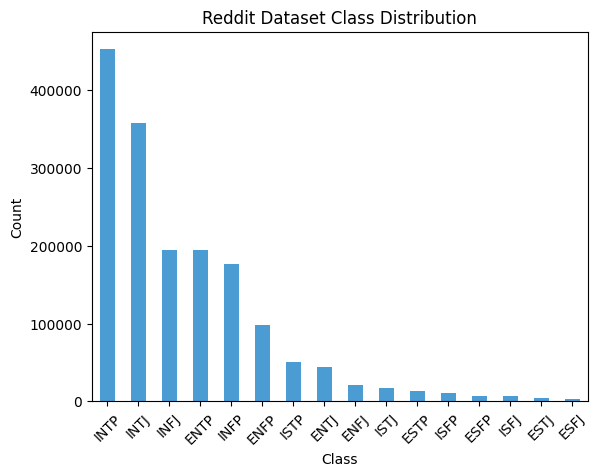

In [40]:
# Plot class distribution
reddit_df['class'].value_counts().plot(kind='bar', color='#4B9CD3')
plt.title('Reddit Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=45)

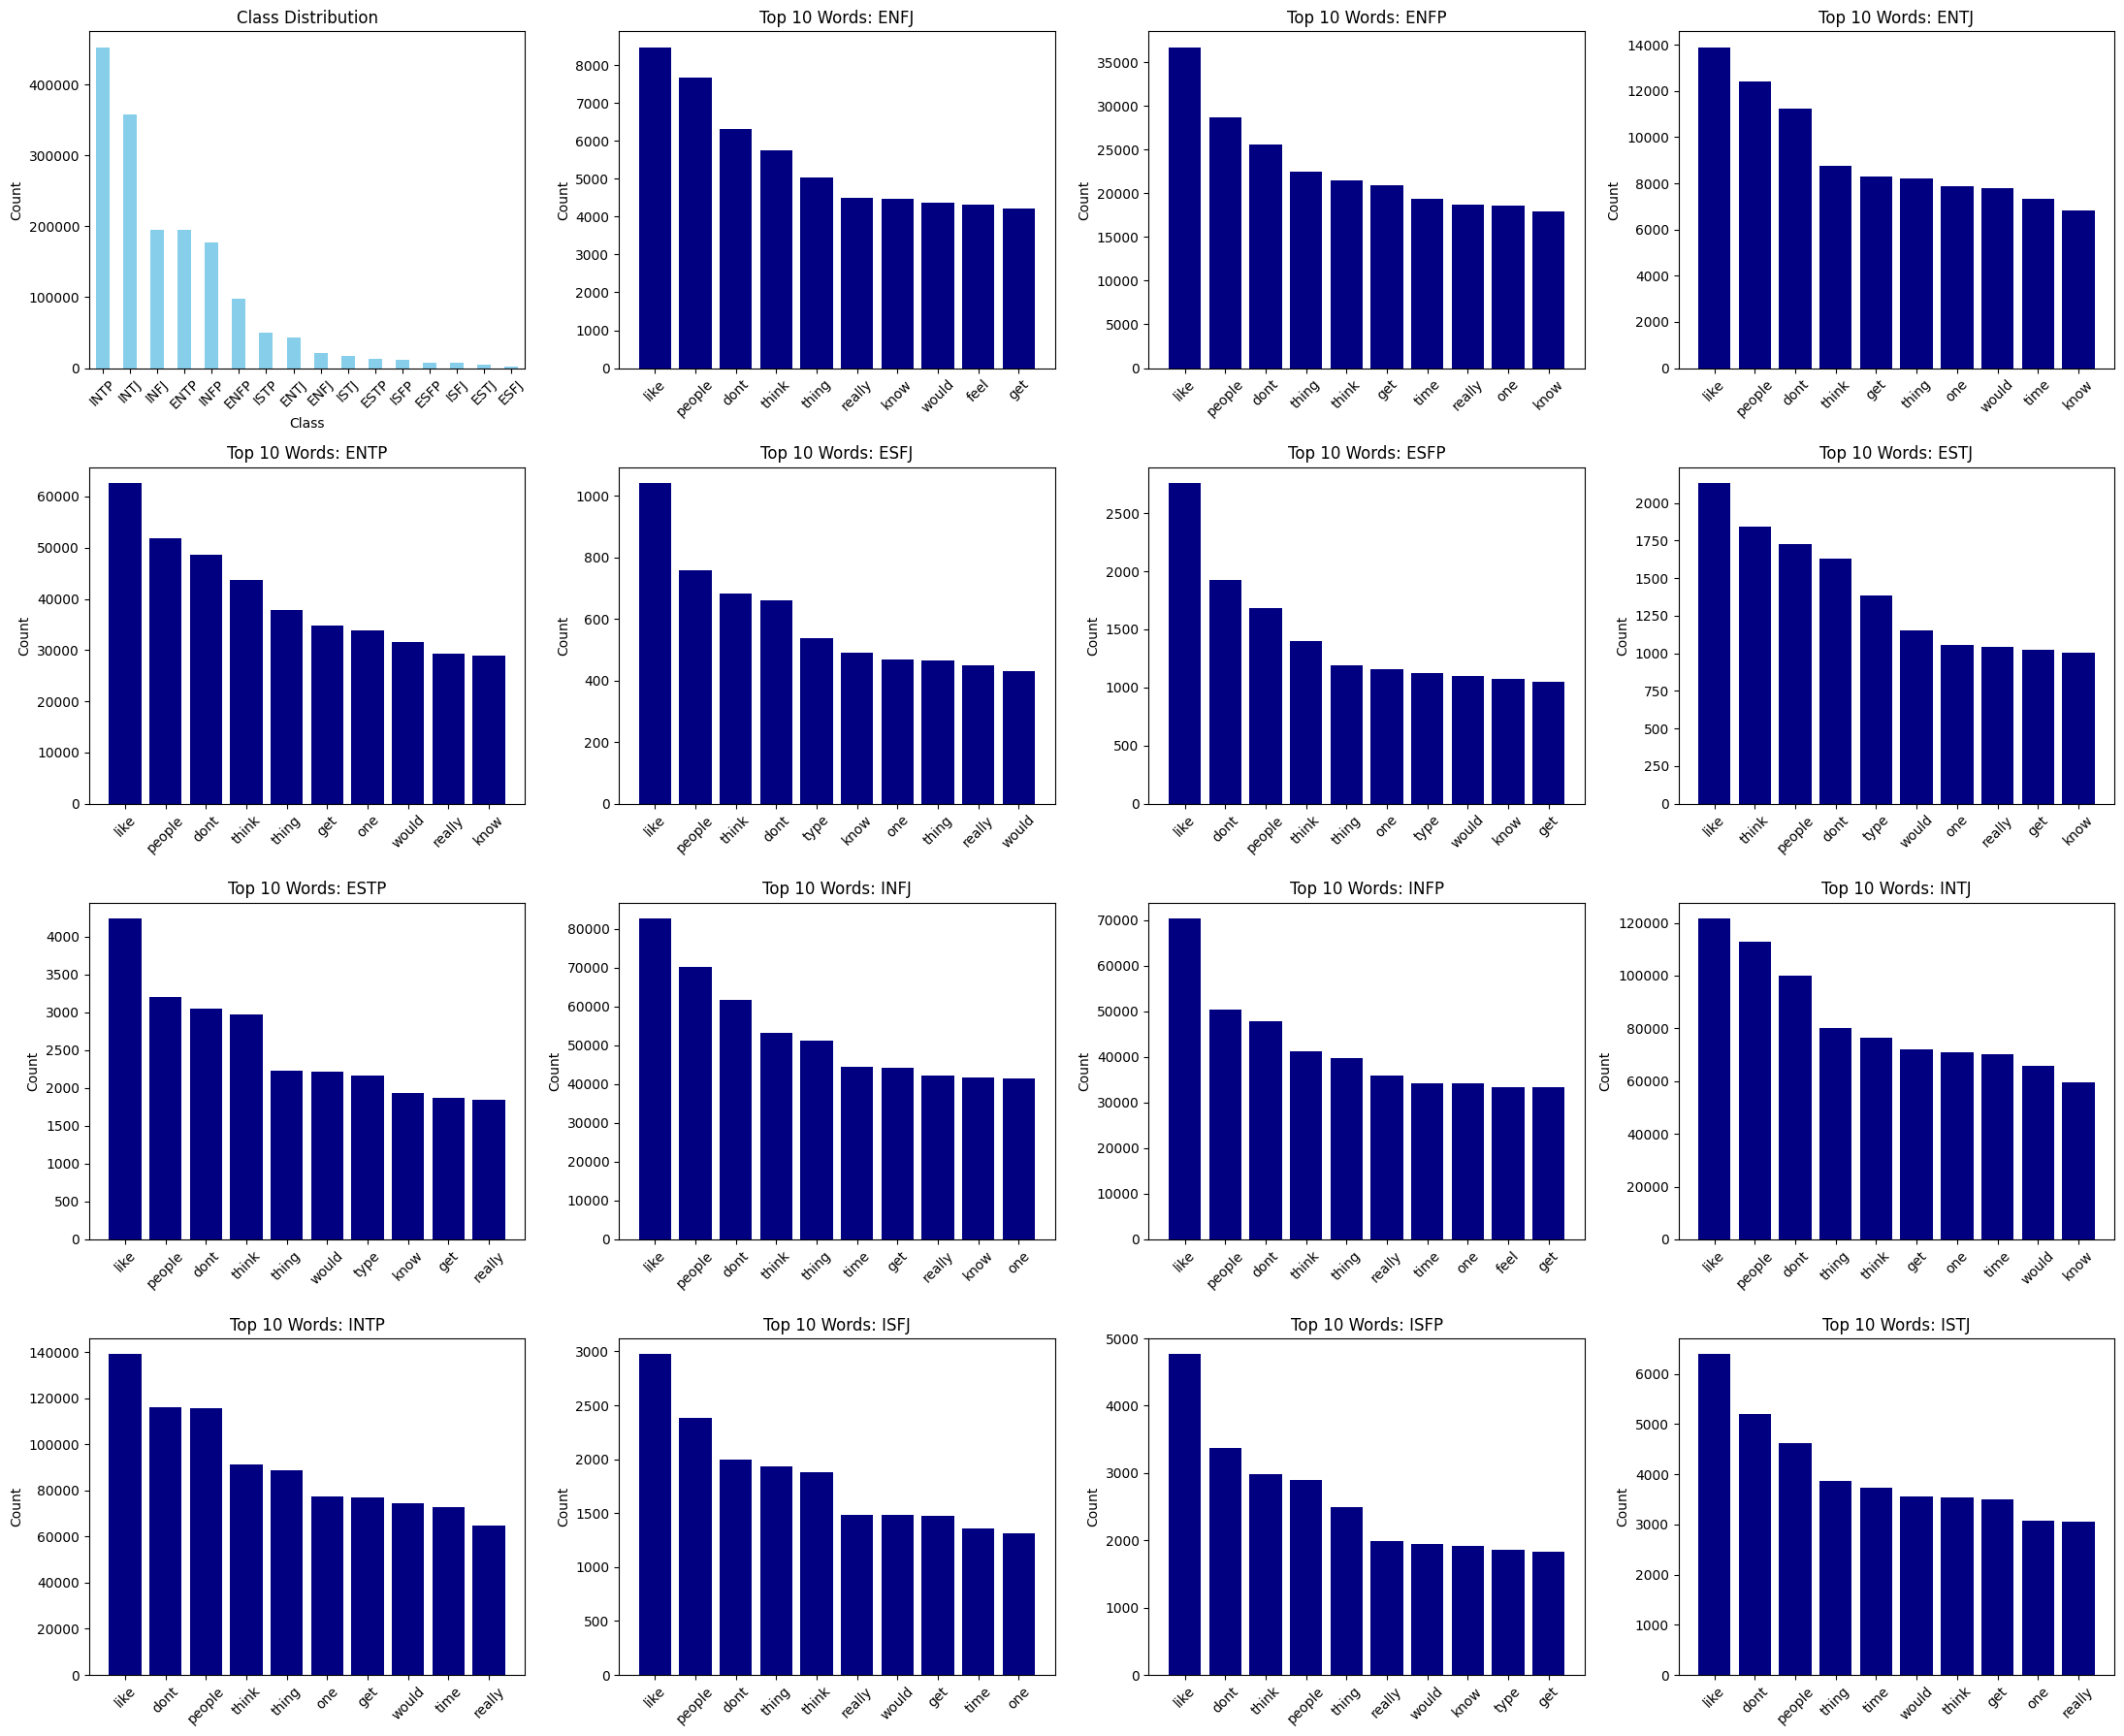

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualization of class distribution and top words per class
class_labels = list(grouped.index)
n_classes = len(class_labels)
n_plots = min(15, n_classes)  # up to 15 classes for 4x4 grid (1 plot for class dist)
fig, axes = plt.subplots(4, 4, figsize=(22, 18))
axes = axes.flatten()

# Plot class distribution
reddit_df['class'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 words for each class
for i, class_name in enumerate(class_labels[:15]):
    words, counts = zip(*common_words[class_name])
    axes[i+1].bar(words, counts, color='navy')
    axes[i+1].set_title(f"Top 10 Words: {class_name}")
    axes[i+1].tick_params(axis='x', rotation=45)
    axes[i+1].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig('images/class_word_distribution.png')

---
### Kaggle Dataset Overview

In [14]:
kaggle_df.head(10)

,type,posts,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,...,ESTP,ESFP,Introvert,Extrovert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving
0,INFJ,"['moment', 'sportscenter', 'top', 'ten', 'play...",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
1,INFJ,"['lifechanging', 'experience', 'life']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,INFJ,"['repeat', 'today']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
3,INFJ,"['may', 'perc', 'experience', 'immerse']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
4,INFJ,"['last', 'thing', 'friend', 'posted', 'faceboo...",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
5,INFJ,"['hello', '7', 'sorry', 'hear', 'distress', 'n...",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
6,INFJ,"['84389', '84390']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
7,INFJ,"['welcome', 'stuff']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
8,INFJ,"['game', 'set', 'match']",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
9,INFJ,"['prozac', 'wellbrutin', 'least', 'thirty', 'm...",0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0


In [23]:
kaggle_df.describe().round(2)

,ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ENTJ,ENTP,...,ESTP,ESFP,Introvert,Extrovert,Sensing,Intuition,Thinking,Feeling,Judging,Perceiving
count,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,...,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00,410915.00
mean,0.02,0.02,0.17,0.12,0.04,0.03,0.21,0.15,0.03,0.08,...,0.01,0.01,0.77,0.23,0.14,0.86,0.46,0.54,0.40,0.60
std,0.15,0.14,0.38,0.33,0.19,0.17,0.41,0.36,0.16,0.27,...,0.10,0.07,0.42,0.42,0.34,0.34,0.50,0.50,0.49,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [4]:
kaggle_df.columns

Index(['type', 'posts', 'ISTJ', 'ISFJ', 'INFJ', 'INTJ', 'ISTP', 'ISFP', 'INFP',
       'INTP', 'ENTJ', 'ENTP', 'ENFJ', 'ENFP', 'ESTJ', 'ESFJ', 'ESTP', 'ESFP',
       'Introvert', 'Extrovert', 'Sensing', 'Intuition', 'Thinking', 'Feeling',
       'Judging', 'Perceiving'],
      dtype='object')

In [5]:
print('Shape:', kaggle_df.shape)

Shape: (410915, 26)


In [16]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410915 entries, 0 to 410914
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   type        410915 non-null  object
 1   posts       410915 non-null  object
 2   ISTJ        410915 non-null  int64 
 3   ISFJ        410915 non-null  int64 
 4   INFJ        410915 non-null  int64 
 5   INTJ        410915 non-null  int64 
 6   ISTP        410915 non-null  int64 
 7   ISFP        410915 non-null  int64 
 8   INFP        410915 non-null  int64 
 9   INTP        410915 non-null  int64 
 10  ENTJ        410915 non-null  int64 
 11  ENTP        410915 non-null  int64 
 12  ENFJ        410915 non-null  int64 
 13  ENFP        410915 non-null  int64 
 14  ESTJ        410915 non-null  int64 
 15  ESFJ        410915 non-null  int64 
 16  ESTP        410915 non-null  int64 
 17  ESFP        410915 non-null  int64 
 18  Introvert   410915 non-null  int64 
 19  Extrovert   410915 non-

In [ ]:
# Check for missing values
kaggle_df.isnull().sum()

type          0
posts         0
ISTJ          0
ISFJ          0
INFJ          0
INTJ          0
ISTP          0
ISFP          0
INFP          0
INTP          0
ENTJ          0
ENTP          0
ENFJ          0
ENFP          0
ESTJ          0
ESFJ          0
ESTP          0
ESFP          0
Introvert     0
Extrovert     0
Sensing       0
Intuition     0
Thinking      0
Feeling       0
Judging       0
Perceiving    0
dtype: int64

In [60]:
# Get a sample row of each class but only class row 
sample_rows = kaggle_df.groupby('type').first()
print(sample_rows[['posts']].to_markdown())

| type   | posts                                                                                                                                                                         |
|:-------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ENFJ   | ['51']                                                                                                                                                                        |
| ENFP   | ['doesnt', 'want', 'go', 'trip', 'without', 'staying', 'behind', 'wouldnt', 'option', 'think', 'really', 'believe', 'im', 'one', 'unreasonable', 'still', 'continues', 'say'] |
| ENTJ   | ['youre', 'fired']                                                                                                                                                            |
| ENTP   | ['im', 'finding', 'lack', 'post', 'alarming']         

| type   | posts                                                                                                                                                                         |
|:-------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ENFJ   | ['51']                                                                                                                                                                        |
| ENFP   | ['doesnt', 'want', 'go', 'trip', 'without', 'staying', 'behind', 'wouldnt', 'option', 'think', 'really', 'believe', 'im', 'one', 'unreasonable', 'still', 'continues', 'say'] |
| ENTJ   | ['youre', 'fired']                                                                                                                                                            |
| ENTP   | ['im', 'finding', 'lack', 'post', 'alarming']                                                                                                                                 |
| ESFJ   | []                                                                                                                                                                            |
| ESFP   | ['edit', 'forgot', 'board']                                                                                                                                                   |
| ESTJ   | ['catch', '22']                                                                                                                                                               |
| ESTP   | ['splinter', 'cell', 'blacklist', 'xbox', '360']                                                                                                                              |
| INFJ   | ['moment', 'sportscenter', 'top', 'ten', 'play', 'prank']                                                                                                                     |
| INFP   | ['think', 'agree', 'personally', 'dont', 'consider', 'alpha', 'beta', 'foxtrot', 'lol', 'joke', 'people', 'people', 'agree', 'emotion', 'isnt', 'weak', 'whiny']              |
| INTJ   | ['dear', 'enjoyed', 'conversation', 'day', 'esoteric', 'gabbing', 'nature', 'universe', 'idea', 'every', 'rule', 'social', 'code', 'arbitrary', 'construct', 'created']       |
| INTP   | ['good', 'one', '_____']                                                                                                                                                      |
| ISFJ   | ['love', 'feeling', 'affectionate', 'one', 'love', 'care', 'care', 'deeply', 'want', 'protect', 'make', 'happy', 'always', 'side', 'feel', 'romantic', 'love', 'probably']    |
| ISFP   | ['paint', 'without', 'number']                                                                                                                                                |
| ISTJ   | ['newton', 'universal', 'gravity', 'law', 'mean', 'seriously', 'would', 'nothing', 'followed', 'law', 'dust', 'particle', 'space']                                            |
| ISTP   | ['got', '593', 'ive', 'read', 'enneagram', 'im', '953', 'though', 'read', 'somewhere', 'lot', '9', 'mistype', '5']                                                            |

In [8]:
# Group by 'class' and concatenate all 'body' text
grouped = kaggle_df.groupby('type')['posts'].apply(lambda texts: ' '.join(str(t) for t in texts))

# For each class, tokenize and count most common words
common_words = {}
for classes, bodies in grouped.items():
    # Basic tokenization: lowercase, remove non-alphabetic, split
    words = re.findall(r'\b[a-z]{3,}\b', bodies.lower())

    # Get the top 10 most common words
    word_counts = Counter(words)

    word_list = []
    for word, count in word_counts.most_common(10):
        word_list.append((word, count))
    common_words[classes] = word_list

pprint.pprint(common_words)

{'ENFJ': [('like', 1663),
          ('think', 1257),
          ('people', 1180),
          ('dont', 1122),
          ('know', 962),
          ('really', 899),
          ('one', 865),
          ('thing', 818),
          ('get', 799),
          ('would', 783)],
 'ENFP': [('like', 6109),
          ('think', 4096),
          ('dont', 3954),
          ('people', 3699),
          ('know', 3250),
          ('one', 3181),
          ('really', 3115),
          ('thing', 2882),
          ('get', 2809),
          ('time', 2655)],
 'ENTJ': [('like', 1697),
          ('dont', 1360),
          ('think', 1313),
          ('people', 1225),
          ('one', 1036),
          ('would', 968),
          ('get', 945),
          ('know', 920),
          ('thing', 852),
          ('type', 799)],
 'ENTP': [('like', 5402),
          ('dont', 4050),
          ('think', 4000),
          ('people', 3694),
          ('one', 3216),
          ('know', 2859),
          ('get', 2705),
          ('would', 2661),
      

---
#### Combining Datasets

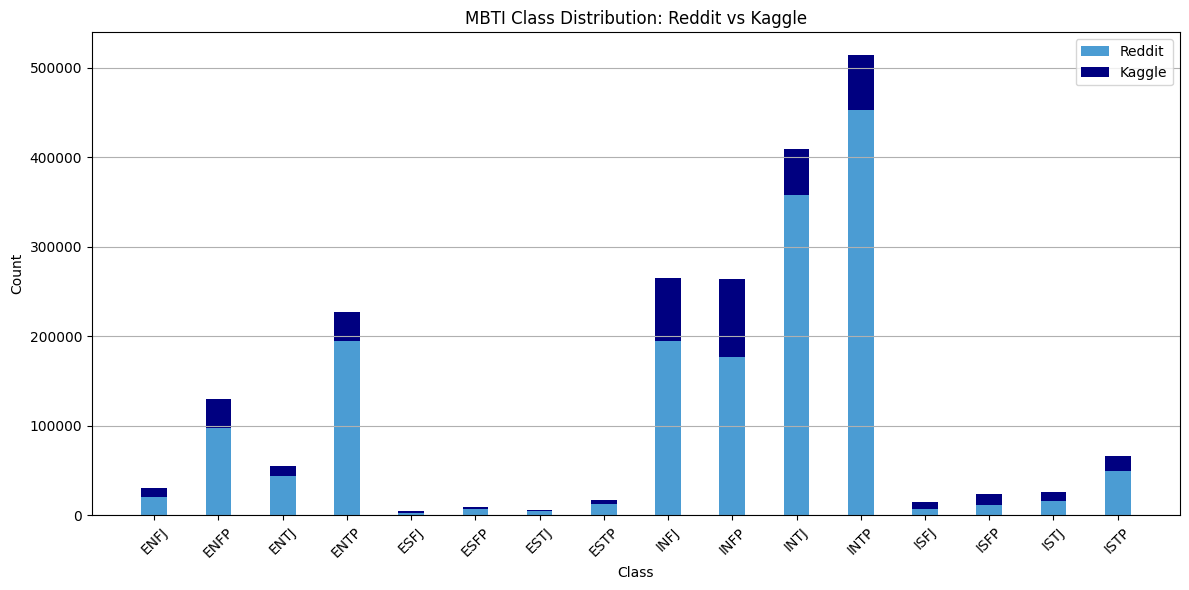

In [36]:
# Plot class distribution for Reddit and Kaggle datasets on the same axes
reddit_counts = reddit_df['class'].value_counts().sort_index()
kaggle_counts = kaggle_df['type'].value_counts().sort_index()

# Align indices for plotting
all_classes = sorted(set(reddit_counts.index).union(set(kaggle_counts.index)))
reddit_plot = [reddit_counts.get(cls, 0) for cls in all_classes]
kaggle_plot = [kaggle_counts.get(cls, 0) for cls in all_classes]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
x = range(len(all_classes))

ax.bar([i for i in x], reddit_plot, width=bar_width, label='Reddit', color='#4B9CD3')
ax.bar([i for i in x], kaggle_plot, bottom=reddit_plot, width=bar_width, label='Kaggle', color='navy')

ax.set_title('MBTI Class Distribution: Reddit vs Kaggle')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(all_classes, rotation=45)
ax.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [41]:
print(f"Reddit Dataset Class Counts:\n{reddit_counts}\n")

Reddit Dataset Class Counts:
class
ENFJ     20936
ENFP     97835
ENTJ     43642
ENTP    194338
ESFJ      2651
ESFP      7483
ESTJ      4477
ESTP     12793
INFJ    194680
INFP    176991
INTJ    358042
INTP    452235
ISFJ      7002
ISFP     11345
ISTJ     16590
ISTP     50060
Name: count, dtype: int64



In [38]:
print(f"Kaggle Dataset Class Counts:\n{kaggle_counts}\n")

Kaggle Dataset Class Counts:
type
ENFJ     9104
ENFP    32083
ENTJ    10988
ENTP    33024
ESFJ     1986
ESFP     2141
ESTJ     1880
ESTP     4238
INFJ    69990
INFP    86959
INTJ    51129
INTP    61438
ISFJ     7886
ISFP    12460
ISTJ     9628
ISTP    15981
Name: count, dtype: int64



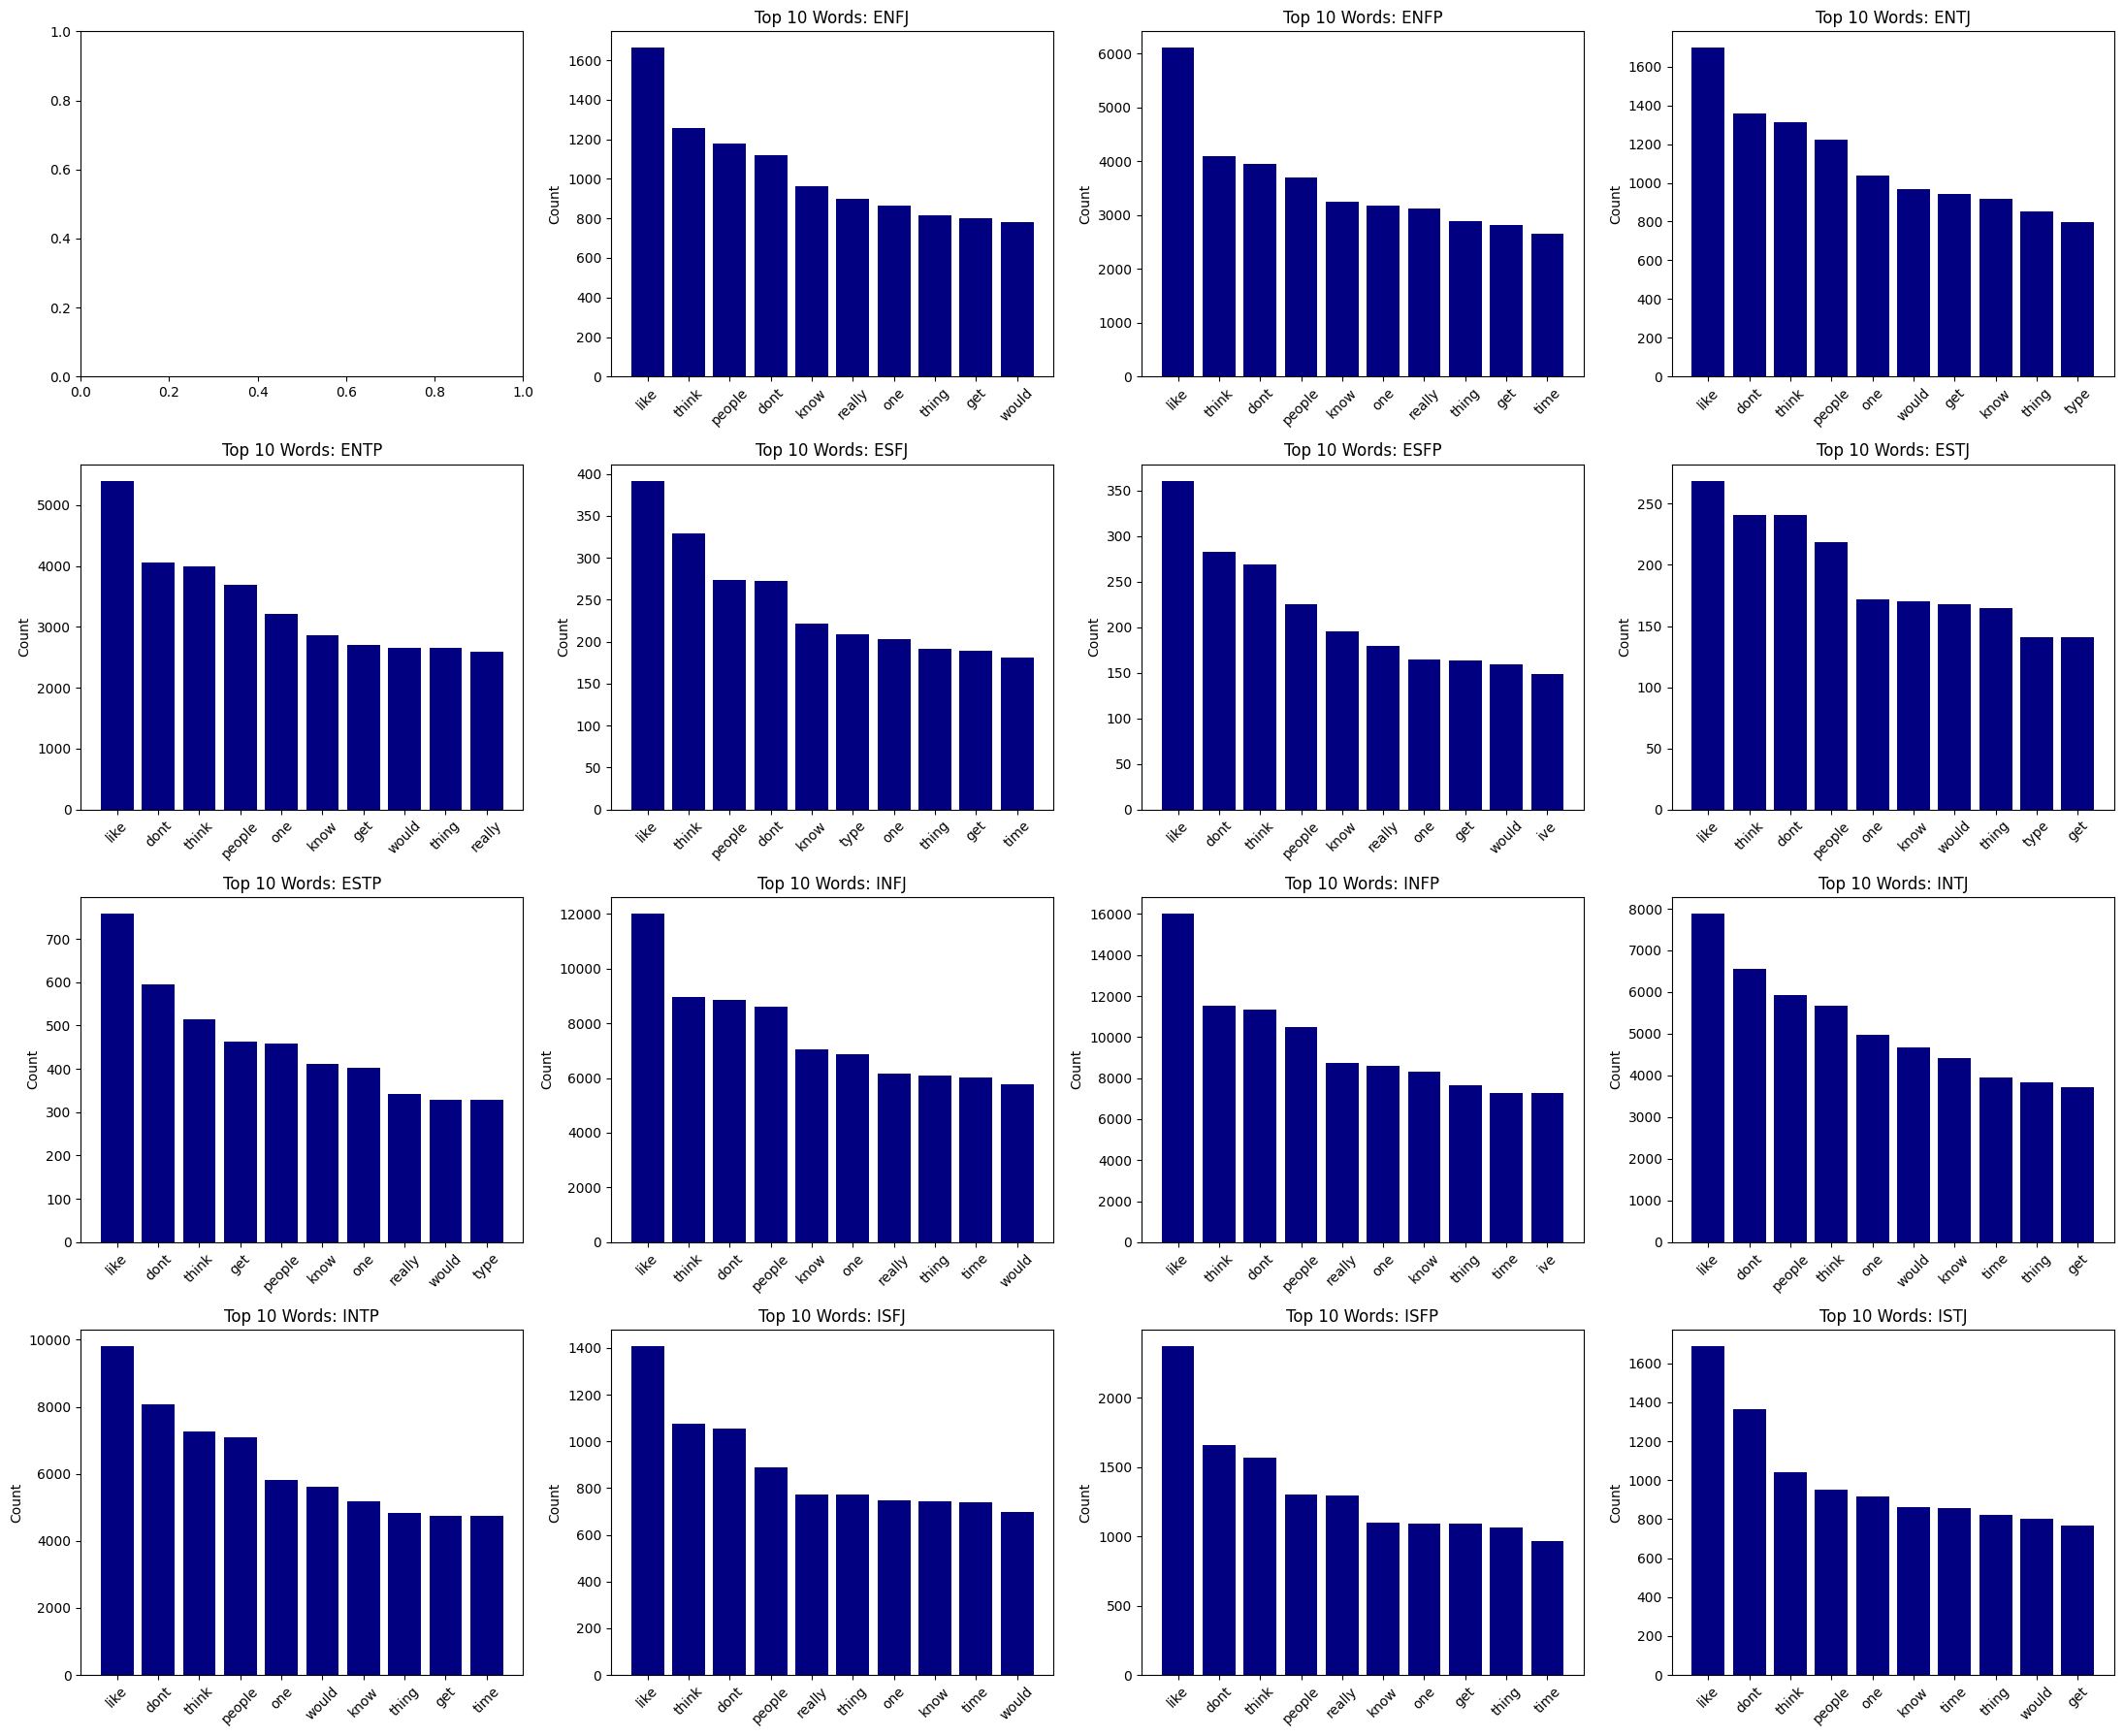

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualization of class distribution and top words per class
class_labels = list(grouped.index)
n_classes = len(class_labels)
n_plots = min(15, n_classes)  # up to 15 classes for 4x4 grid (1 plot for class dist)
fig, axes = plt.subplots(4, 4, figsize=(22, 18))
axes = axes.flatten()

# Plot class distribution
kaggle_df['type'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Kaggle Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 words for each class
for i, class_name in enumerate(class_labels[:15]):
    words, counts = zip(*common_words[class_name])
    axes[i+1].bar(words, counts, color='navy')
    axes[i+1].set_title(f"Top 10 Words: {class_name}")
    axes[i+1].tick_params(axis='x', rotation=45)
    axes[i+1].set_ylabel('Count')

plt.tight_layout()
plt.show()
plt.savefig('images/kaggle_word_distribution.png')

## Analysis Notes

The bar charts above show an imbalance in the representation of the different MBTI classes with a majority of the "Introverted" classes occurring more in the data than "Extroverted" datasets. This could affect the accuracys of any models built off of this dataset as those classes will have more data to train the models on. Additionally, the top word counts show that the various classes share a majority of the most commonly occuring words, this may also make model development difficult due to the similarities of the information shared by the groups.

## Discussion of Data Plots and Class Distribution

The visualizations above reveal significant class imbalance in both the Reddit and Kaggle MBTI datasets. Certain personality types, especially "Introverted" classes, are much more prevalent than "Extroverted" ones. This imbalance is evident in the bar charts, where some classes have thousands of samples while others have far fewer.

### Gaps in Distribution

Class imbalance can lead to biased models that perform well on majority classes but poorly on minority ones. This is a common issue in real-world datasets and can negatively impact classification accuracy, especially for underrepresented groups.

### Handling Class Imbalance

To address these gaps, several techniques can be applied:

- **Oversampling**: Increasing the number of samples in minority classes by duplicating existing data or generating synthetic samples.
- **Undersampling**: Reducing the number of samples in majority classes to balance the dataset, though this may result in loss of valuable information.
- **Synthetic Minority Over-sampling Technique (SMOTE)**: SMOTE generates synthetic examples for minority classes by interpolating between existing samples. This helps create a more balanced dataset without simply duplicating data.

### Implementation Considerations

- **Oversampling and SMOTE** are typically applied during model training, after splitting the data into train and test sets.
- These techniques help mitigate bias, improve model generalization, and ensure that minority classes are adequately represented in the learning process.

**Summary:**  
Class imbalance is a critical issue in MBTI datasets. Techniques like oversampling and SMOTE are effective strategies to address this, leading to fairer and more robust predictive models.

In [33]:
# Delete the extracted CSV file(s) to clean up
files = ['reddit_data.csv', 'reddit_data.zip', 'kaggle_data.csv']

for file in files:
    try:
        os.remove(f'data/{file}')
        print("Removed file:", file)
    except FileNotFoundError:
        print("Error | Count not find file to remove:", file)

Error | Count not find file to remove: reddit_data.csv
Removed file: reddit_data.zip
Error | Count not find file to remove: kaggle_data.csv
